<a href="https://colab.research.google.com/github/VadbOss/Vadim-s_repa/blob/main/GRU_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, MaxPooling2D, Dropout, Flatten, UpSampling2D, Embedding, GlobalMaxPooling1D,\
                         Conv1D, GlobalMaxPool1D, LSTM, GRU
from keras.datasets import mnist
from keras import utils
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Используются три архитектуры НС:


*   Одномерная сверточнай нейросеть;
*   Рекурентная нейросеть LSTM;
*   Рекурентная нейросеть GRU.





In [66]:
# Максимальное количество слов
num_words = 10000
# Максимальная длина новости
max_news_len = 30
# Количество классов новостей
nb_classes = 4

# Загрузка наборов данных

Загружаем данные для обучения

In [67]:
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv -O train.csv

--2022-01-30 13:45:11--  https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv [following]
--2022-01-30 13:45:11--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M   164MB/s    in 0.2s    

2022-01-30 13:45:11 (164 MB/s) - ‘train.csv’ saved [29470338/29470338]



Загружаем данные для тестирования

In [68]:
#!wget https://github.com/mhjabreel/CharCnn_Keras/blob/master/data/ag_news_csv/test.csv -O test.csv
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/test.csv -O test.csv

--2022-01-30 13:45:11--  https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/test.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv [following]
--2022-01-30 13:45:12--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1857427 (1.8M) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   1.77M  --.-KB/s    in 0.06s   

2022-01-30 13:45:12 (32.1 MB/s) - ‘test.csv’ saved [1857427/1857427]



Загружаем классы

In [69]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/classes.txt -O classes.txt

--2022-01-30 13:45:12--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]      31  --.-KB/s    in 0s      

2022-01-30 13:45:12 (843 KB/s) - ‘classes.txt’ saved [31/31]



Просматриваем данные

In [70]:
!ls

best_model_cnn.h5  best_model_lstm.h5  sample_data  train.csv
best_model_gru.h5  classes.txt	       test.csv


In [71]:
!cat classes.txt

World
Sports
Business
Sci/Tech


In [72]:
!head -n 5 train.csv

"3","Wall St. Bears Claw Back Into the Black (Reuters)","Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
"3","Carlyle Looks Toward Commercial Aerospace (Reuters)","Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
"3","Oil and Economy Cloud Stocks' Outlook (Reuters)","Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums."
"3","Iraq Halts Oil Exports from Main Southern Pipeline (Reuters)","Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday."
"3","Oil prices soar to all-time record, posing new menace to US e

In [73]:
!head test.csv

"3","Fears for T N pension after talks","Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."
"4","The Race is On: Second Private Team Sets Launch Date for Human Spaceflight (SPACE.com)","SPACE.com - TORONTO, Canada -- A second\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\privately funded suborbital space flight, has officially announced the first\launch date for its manned rocket."
"4","Ky. Company Wins Grant to Study Peptides (AP)","AP - A company founded by a chemistry researcher at the University of Louisville won a grant to develop a method of producing better peptides, which are short chains of amino acids, the building blocks of proteins."
"4","Prediction Unit Helps Forecast Wildfires (AP)","AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning wil

In [74]:
!wc -l train.csv
!wc -l test.csv

120000 train.csv
7600 test.csv


# Загружаем данные в память

Читаем данные из файла

In [75]:
train = pd.read_csv('train.csv',
                    header=None,
                    names=['class', 'title', 'text'])

In [76]:
train

,class,title,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


Выделяем данные для обучения

In [77]:
news = train['text']

In [78]:
news[:5]

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: text, dtype: object

Выделяем правильные ответы

In [79]:
y_train = utils.to_categorical(train['class'] - 1, nb_classes)
#y_train = utils.to_categorical(train['class'] - 1, nb_classes)
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

# Токенизация текста

In [80]:
news[:5]

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: text, dtype: object

Создаем Токенизатор Keras

In [81]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем Токенизатор на новостях

In [82]:
tokenizer.fit_on_texts(news)

Просматриваем словарь Токенизатора

In [83]:
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'its': 14,
 'at': 15,
 'said': 16,
 'is': 17,
 'by': 18,
 'it': 19,
 'has': 20,
 'new': 21,
 'an': 22,
 'from': 23,
 'reuters': 24,
 'his': 25,
 'will': 26,
 'was': 27,
 'after': 28,
 'have': 29,
 'be': 30,
 'their': 31,
 'two': 32,
 'are': 33,
 'us': 34,
 'over': 35,
 'quot': 36,
 'year': 37,
 'first': 38,
 'ap': 39,
 'he': 40,
 'but': 41,
 'gt': 42,
 'lt': 43,
 'this': 44,
 'more': 45,
 'monday': 46,
 'wednesday': 47,
 'one': 48,
 'tuesday': 49,
 'up': 50,
 'thursday': 51,
 'company': 52,
 'inc': 53,
 'friday': 54,
 'world': 55,
 'than': 56,
 'u': 57,
 '1': 58,
 'last': 59,
 'they': 60,
 'york': 61,
 'yesterday': 62,
 'against': 63,
 'about': 64,
 'who': 65,
 'not': 66,
 'were': 67,
 'into': 68,
 'out': 69,
 'three': 70,
 'been': 71,
 'president': 72,
 '2': 73,
 'had': 74,
 'million': 75,
 'corp': 76,
 'oil': 77,
 'when': 78,
 'week': 79,
 'time'

Преобразуем новости в числовое представление

In [84]:
sequences = tokenizer.texts_to_sequences(news)

Просматриваем новости в числовом представлении

In [85]:
index = 1
print(news[index])
print(sequences[index])

Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
[24, 863, 751, 371, 93, 84, 20, 2, 3916, 8, 453, 431, 6, 1308, 2799, 5, 1, 549, 237, 20, 3528, 2002, 14, 8267, 7, 216, 314, 4, 1, 131]


In [86]:
tokenizer.word_index['making']

453

Ограничиваем длину отзывов

In [87]:
x_train = pad_sequences(sequences, maxlen=max_news_len)
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   24,  758, 7851,  433,
        5786, 2861,    4, 5916,   33, 3642,  831,  432],
       [  24,  863,  751,  371,   93,   84,   20,    2, 3916,    8,  453,
         431,    6, 1308, 2799,    5,    1,  549,  237,   20, 3528, 2002,
          14, 8267,    7,  216,  314,    4,    1,  131],
       [  24, 2199,  463,  105, 1568, 1484,   64,    1,  397,    6,    1,
        1026,    8,  317,   33,  178,    3, 6377,   35,    1,  311,  131,
          99,   79,  189,    1, 6120,    4,    1, 1068],
       [   0,   24,  713,   29, 5142,   77, 3549, 7993,   23,    1,  737,
        3199,    5,  493,  106,   28, 1402,  573,    2,  825, 2601,   90,
         760, 2559,   22,   77,  292,   16,    7,   97],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  165,
          55,   77,  105, 8851, 1776,    6, 8268, 3454,    2,   21,  343,
        3036,   70,  266,  151, 

Сверточная НС

In [88]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_news_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(4, activation='softmax'))

In [89]:
model_cnn.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [90]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 30, 32)            320000    
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 250)           40250     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 250)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               32128     
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 392,894
Trainable params: 392,894
Non-trainable params: 0
________________________________________________

Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл best_model.h5

In [91]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [92]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/5
841/844 [============================>.] - ETA: 0s - loss: 0.4368 - accuracy: 0.8391
Epoch 00001: val_accuracy improved from -inf to 0.89000, saving model to best_model_cnn.h5
844/844 [==============================] - 10s 11ms/step - loss: 0.4365 - accuracy: 0.8393 - val_loss: 0.3107 - val_accuracy: 0.8900
Epoch 2/5
840/844 [============================>.] - ETA: 0s - loss: 0.2499 - accuracy: 0.9148
Epoch 00002: val_accuracy did not improve from 0.89000
844/844 [==============================] - 8s 9ms/step - loss: 0.2502 - accuracy: 0.9147 - val_loss: 0.3221 - val_accuracy: 0.8882
Epoch 3/5
841/844 [============================>.] - ETA: 0s - loss: 0.1943 - accuracy: 0.9329
Epoch 00003: val_accuracy did not improve from 0.89000
844/844 [==============================] - 8s 10ms/step - loss: 0.1945 - accuracy: 0.9329 - val_loss: 0.3578 - val_accuracy: 0.8742
Epoch 4/5
842/844 [============================>.] - ETA: 0s - loss: 0.1427 - accuracy: 0.9507
Epoch 00004: val_accura

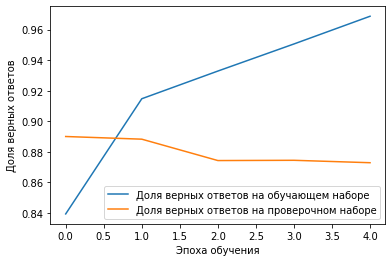

In [93]:
plt.plot(history_cnn.history['accuracy'],
                             label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'],
                             label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Нейросеть LSTM

In [94]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_news_len))
model_lstm.add(LSTM(16))
model_lstm.add(Dense(4, activation='softmax'))

In [95]:
model_lstm.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [96]:
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 30, 32)            320000    
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense_6 (Dense)             (None, 4)                 68        
                                                                 
Total params: 323,204
Trainable params: 323,204
Non-trainable params: 0
_________________________________________________________________


In [97]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [98]:
history_lstm = model_lstm.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_lstm])

Epoch 1/5
841/844 [============================>.] - ETA: 0s - loss: 0.5184 - accuracy: 0.8192
Epoch 00001: val_accuracy improved from -inf to 0.88500, saving model to best_model_lstm.h5
844/844 [==============================] - 13s 12ms/step - loss: 0.5176 - accuracy: 0.8194 - val_loss: 0.3330 - val_accuracy: 0.8850
Epoch 2/5
840/844 [============================>.] - ETA: 0s - loss: 0.2716 - accuracy: 0.9123
Epoch 00002: val_accuracy improved from 0.88500 to 0.88992, saving model to best_model_lstm.h5
844/844 [==============================] - 9s 11ms/step - loss: 0.2715 - accuracy: 0.9123 - val_loss: 0.3152 - val_accuracy: 0.8899
Epoch 3/5
844/844 [==============================] - ETA: 0s - loss: 0.2329 - accuracy: 0.9245
Epoch 00003: val_accuracy improved from 0.88992 to 0.89058, saving model to best_model_lstm.h5
844/844 [==============================] - 9s 11ms/step - loss: 0.2329 - accuracy: 0.9245 - val_loss: 0.3146 - val_accuracy: 0.8906
Epoch 4/5
841/844 [=================

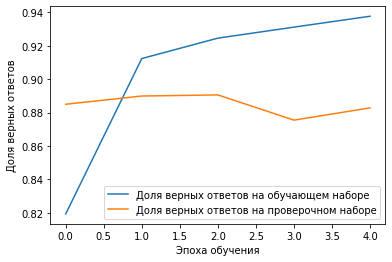

In [99]:
plt.plot(history_lstm.history['accuracy'],
                             label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'],
                             label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Нейросеть GRU

In [100]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_news_len))
model_gru.add(GRU(16))
model_gru.add(Dense(4, activation='softmax'))

In [101]:
model_gru.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [102]:
model_gru.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 30, 32)            320000    
                                                                 
 gru_1 (GRU)                 (None, 16)                2400      
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
Total params: 322,468
Trainable params: 322,468
Non-trainable params: 0
_________________________________________________________________


In [103]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [104]:
history_gru = model_gru.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_gru])

Epoch 1/5
842/844 [============================>.] - ETA: 0s - loss: 0.5630 - accuracy: 0.7922
Epoch 00001: val_accuracy improved from -inf to 0.87383, saving model to best_model_gru.h5
844/844 [==============================] - 12s 12ms/step - loss: 0.5626 - accuracy: 0.7924 - val_loss: 0.3550 - val_accuracy: 0.8738
Epoch 2/5
843/844 [============================>.] - ETA: 0s - loss: 0.3025 - accuracy: 0.9027
Epoch 00002: val_accuracy improved from 0.87383 to 0.88300, saving model to best_model_gru.h5
844/844 [==============================] - 9s 11ms/step - loss: 0.3024 - accuracy: 0.9027 - val_loss: 0.3278 - val_accuracy: 0.8830
Epoch 3/5
840/844 [============================>.] - ETA: 0s - loss: 0.2623 - accuracy: 0.9153
Epoch 00003: val_accuracy did not improve from 0.88300
844/844 [==============================] - 9s 11ms/step - loss: 0.2624 - accuracy: 0.9152 - val_loss: 0.3332 - val_accuracy: 0.8812
Epoch 4/5
843/844 [============================>.] - ETA: 0s - loss: 0.2356 - 

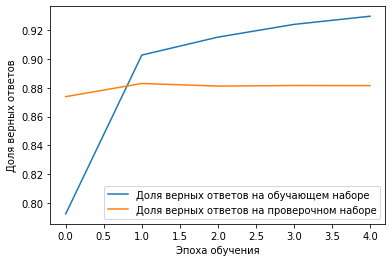

In [105]:
plt.plot(history_gru.history['accuracy'],
                             label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'],
                             label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Загружаем набор данных для тестирования

In [106]:
test = pd.read_csv('test.csv',
                   header=None,
                   names=['class', 'title', 'text'])

In [107]:
test

,class,title,text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...


Преобразуем новости в числовое представление

Обратить внимание на то, что нужно использовать Токенизатор обученный на train

In [108]:
test_sequences = tokenizer.texts_to_sequences(test['text'])

In [109]:
x_test = pad_sequences(test_sequences, maxlen=max_news_len)

In [120]:
x_test[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 2020, 3371,  449,   15, 6956,  252,   60,   33,
          28,  289,   12, 9088, 2184,  371,  169, 9284],
       [  92,  119,    4, 3472,    8,    1,  402,  134,   75, 5471, 1516,
        1227,    2, 3436,    8, 2744, 5220,  230,  936,   20, 2148,  117,
           1,   38,  561, 1974,    8,   14, 3957, 1218],
       [   2,   52, 5787,   18,    2, 4914,   15,    1,  525,    4, 4586,
         227,    2, 3922,    3, 1316,    2, 6888,    4, 2893,  576,   84,
          33,  758, 6515,    4,    1, 1013, 5154,    4],
       [9642, 1291,    6, 8714,   41,  671,   40, 2977,  177,    1,  108,
          26, 1027, 7300,   26,  760,    5, 3356,   40, 1271, 2450,   26,
        2170,   50, 3356,   26, 7415,    6, 9153,   26],
       [   0,    0,    0,    0,    0,    0,   39,  493, 7343,  832,  400,
         820,   28, 3827,    4,    1, 4474,   54, 9411,    1, 1273,   38,
        1230,    3, 1365,  348, 

Правильные ответы

In [111]:
y_test = utils.to_categorical(test['class']-1, nb_classes)

In [112]:
y_test

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

# Оцениваем качество работы сети на тестовых данных

Одномерная сверточная сеть

In [113]:
model_cnn.load_weights(model_cnn_save_path)

In [114]:
model_cnn.evaluate(x_test, y_test, verbose=1)   # 89.18

238/238 [==============================] - 1s 4ms/step - loss: 0.3201 - accuracy: 0.8945


[0.32014167308807373, 0.894473671913147]

Сеть LSTM

In [115]:
model_lstm.load_weights(model_lstm_save_path) # 89.50

In [116]:
model_lstm.evaluate(x_test, y_test, verbose=1)

238/238 [==============================] - 1s 5ms/step - loss: 0.3220 - accuracy: 0.8930


[0.32203418016433716, 0.8930262923240662]

GRU

In [117]:
model_gru.load_weights(model_gru_save_path)  # 89.62

In [118]:
model_gru.evaluate(x_test, y_test, verbose=1)

238/238 [==============================] - 1s 5ms/step - loss: 0.3374 - accuracy: 0.8882


[0.3374077081680298, 0.8881579041481018]

238/238 [==============================] - 1s 5ms/step - loss: 0.3374 - accuracy: 0.8882


No handles with labels found to put in legend.


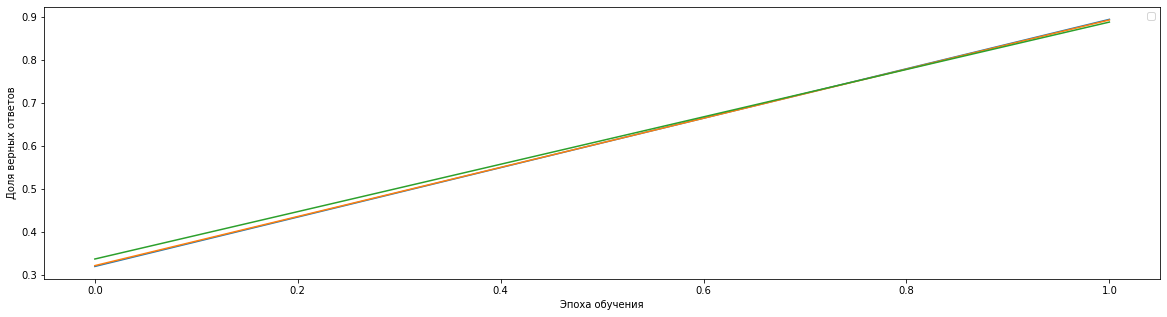

In [119]:
plt.figure(figsize=(20, 5))
plt.plot(model_cnn.evaluate(x_test, y_test, verbose=1))
plt.plot( model_lstm.evaluate(x_test, y_test, verbose=1))
plt.plot(model_gru.evaluate(x_test, y_test, verbose=1))

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()